In [2]:
# Import dependencies
import os, quandl, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import *

In [3]:
import statsmodels.api as sm
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [4]:
# Get data from Quandl
# What is Quandl? It is a marketplace for financial, economic and alternative data 
# delivered in modern formats for today's analysts, including Python.

def get_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    print cache_path
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [5]:
ripple= pd.read_csv('/home/rkopeinig/Downloads/xrp-eur-max.csv')
stellar= pd.read_csv('/home/rkopeinig/Downloads/xlm-eur-max.csv')


In [8]:
ripple

,snapped_at,price,market_cap,total_volume
0,2013-08-04 00:00:00 UTC,0.004069,3.181127e+07,0.000000e+00
1,2013-08-05 00:00:00 UTC,0.003868,3.023902e+07,0.000000e+00
2,2013-08-06 00:00:00 UTC,0.003226,2.521692e+07,0.000000e+00
3,2013-08-07 00:00:00 UTC,0.003085,2.411547e+07,0.000000e+00
4,2013-08-08 00:00:00 UTC,0.002924,2.285749e+07,0.000000e+00
5,2013-08-09 00:00:00 UTC,0.002908,2.273241e+07,0.000000e+00
6,2013-08-10 00:00:00 UTC,0.002940,2.298126e+07,0.000000e+00
7,2013-08-11 00:00:00 UTC,0.002956,2.310901e+07,0.000000e+00
8,2013-08-12 00:00:00 UTC,0.002986,2.334127e+07,0.000000e+00
9,2013-08-13 00:00:00 UTC,0.002882,2.252827e+07,0.000000e+00


In [9]:
ripple = ripple.set_index(ripple['snapped_at'])

In [10]:
ripple

,snapped_at,price,market_cap,total_volume
snapped_at,,,,
2013-08-04 00:00:00 UTC,2013-08-04 00:00:00 UTC,0.004069,3.181127e+07,0.000000e+00
2013-08-05 00:00:00 UTC,2013-08-05 00:00:00 UTC,0.003868,3.023902e+07,0.000000e+00
2013-08-06 00:00:00 UTC,2013-08-06 00:00:00 UTC,0.003226,2.521692e+07,0.000000e+00
2013-08-07 00:00:00 UTC,2013-08-07 00:00:00 UTC,0.003085,2.411547e+07,0.000000e+00
2013-08-08 00:00:00 UTC,2013-08-08 00:00:00 UTC,0.002924,2.285749e+07,0.000000e+00
2013-08-09 00:00:00 UTC,2013-08-09 00:00:00 UTC,0.002908,2.273241e+07,0.000000e+00
2013-08-10 00:00:00 UTC,2013-08-10 00:00:00 UTC,0.002940,2.298126e+07,0.000000e+00
2013-08-11 00:00:00 UTC,2013-08-11 00:00:00 UTC,0.002956,2.310901e+07,0.000000e+00
2013-08-12 00:00:00 UTC,2013-08-12 00:00:00 UTC,0.002986,2.334127e+07,0.000000e+00


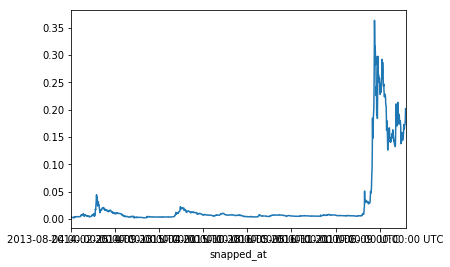

In [12]:
ripple['price'].plot()
plt.show()

In [14]:
stellar = stellar.set_index(stellar['snapped_at'])

In [16]:
stellar

,snapped_at,price,market_cap,total_volume
snapped_at,,,,
2014-08-06 00:00:00 UTC,2014-08-06 00:00:00 UTC,0.001989,7.197536e+05,2.315388e+04
2014-08-07 00:00:00 UTC,2014-08-07 00:00:00 UTC,0.001879,8.109665e+05,1.085903e+05
2014-08-08 00:00:00 UTC,2014-08-08 00:00:00 UTC,0.002267,9.916334e+05,6.846766e+04
2014-08-09 00:00:00 UTC,2014-08-09 00:00:00 UTC,0.002613,1.234606e+06,1.745980e+05
2014-08-10 00:00:00 UTC,2014-08-10 00:00:00 UTC,0.003797,1.923550e+06,2.532445e+05
2014-08-11 00:00:00 UTC,2014-08-11 00:00:00 UTC,0.002754,1.738248e+06,3.670173e+05
2014-08-12 00:00:00 UTC,2014-08-12 00:00:00 UTC,0.002004,1.703247e+06,2.597705e+05
2014-08-13 00:00:00 UTC,2014-08-13 00:00:00 UTC,0.002073,1.933306e+06,1.923653e+05
2014-08-14 00:00:00 UTC,2014-08-14 00:00:00 UTC,0.001908,1.867012e+06,1.282402e+05
